In [40]:
from warnings import filterwarnings
filterwarnings("ignore")

In [41]:
class Person:

    def __init__ (self, name: str, age: int):
        self.name = name
        self.age  = age

    def introduce(self):
        print(f"My name is : {self.name}")
        print(f"I am {self.age} years old")

In [42]:
class Employe(Person):

    def __init__(self, name: str, age: int, company: str):
        super().__init__(name, age)
        self.company = company

    def work(self):
        print(f"I work at {self.company}")

In [43]:
p1 = Person(name="abcsdf", age=12)
type(p1)

__main__.Person

In [44]:
p1.name

'abcsdf'

In [45]:
p1.age

12

In [46]:
p1.introduce()

My name is : abcsdf
I am 12 years old


In [47]:
e1 = Employe(name = "Nakul", age=22, company="Apple")
type(e1)

__main__.Employe

In [48]:
e1.work()

I work at Apple


In [49]:
e1.introduce()

My name is : Nakul
I am 22 years old


In [50]:
e1.introduce()
e1.work()

My name is : Nakul
I am 22 years old
I work at Apple


### Example of single inheritance

Pydantic - Is data validation library in python

In [51]:
%pip install pydantic email-validator


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


1. gt - greater than
2. ge - greater than or equal to
3. lt - less than
4. le - less than or equal to

In [52]:
from pydantic import BaseModel, Field, EmailStr
from typing import Literal

In [53]:
class Student(BaseModel):
    roll_no: int = Field(description="Roll no. ", gt=0)
    name: str = Field(description="Name", min_length=1, max_length=50)
    marks: float = Field(description="Marks", gt=0, le=100)
    gender: Literal["male", "female"] = Field(description="Gender")
    email: EmailStr = Field(description= "Email")
    hobbies: list[str] = Field(description="Hobbiest", default_factory=list)

    def get_student_details(self):
        print(f"Roll No : {self.roll_no}")
        print(f"Name : {self.name}")
        print(f"Marks : {self.marks}")
        print(f"Gender : {self.gender}")
        print(f"Email : {self.email}")
        print(f"Hobbies : {self.hobbies}")

In [54]:
s1 = Student(
    roll_no= 101,
    name = "Rohan",
    marks = 78.3,
    gender= "male",
    email= "rohan@test.com",
    hobbies= ["Cricket", "Singing"]
)

In [55]:
s1.get_student_details()

Roll No : 101
Name : Rohan
Marks : 78.3
Gender : male
Email : rohan@test.com
Hobbies : ['Cricket', 'Singing']


In [56]:
s2 = Student(
    roll_no= "a",
    name = 1234,
    marks = 150,
    gender = 23,
    email = 34.5,
    hobbies= {"a":2, "b":2}
)

ValidationError: 6 validation errors for Student
roll_no
  Input should be a valid integer, unable to parse string as an integer [type=int_parsing, input_value='a', input_type=str]
    For further information visit https://errors.pydantic.dev/2.10/v/int_parsing
name
  Input should be a valid string [type=string_type, input_value=1234, input_type=int]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
marks
  Input should be less than or equal to 100 [type=less_than_equal, input_value=150, input_type=int]
    For further information visit https://errors.pydantic.dev/2.10/v/less_than_equal
gender
  Input should be 'male' or 'female' [type=literal_error, input_value=23, input_type=int]
    For further information visit https://errors.pydantic.dev/2.10/v/literal_error
email
  Input should be a valid string [type=string_type, input_value=34.5, input_type=float]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
hobbies
  Input should be a valid list [type=list_type, input_value={'a': 2, 'b': 2}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.10/v/list_type

## Multiple Inheritance

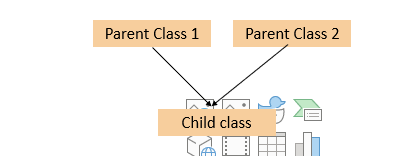

In [57]:
class BaseSalary:

    def __init__(self, base_salary: float):
        self.base_salary = base_salary

    def get_base_salary(self):
        return self.base_salary

In [58]:
class Bonus:
    def __init__(self, bonus_percent: float):
        self.bonus_percent = bonus_percent

    def calculate_bonus(self, salary):
        return (self.bonus_percent/100) * salary

In [59]:
class TotalSalary(BaseSalary, Bonus):

    def __init__(self,name: str, base_salary: float, bouns_percent: float):
        BaseSalary.__init__(self, base_salary)
        Bonus.__init__(self, bouns_percent)
        self.name = name

    def get_total_salary(self):
        bonus = self.calculate_bonus(self.base_salary)
        return self.base_salary + bonus

In [60]:
t1 = TotalSalary(name="Rohan", base_salary=2100000.0, bouns_percent=12.5)

In [61]:
t1.get_base_salary()

2100000.0

In [62]:
t1.calculate_bonus(t1.base_salary)

262500.0

In [63]:
t1.get_total_salary()

2362500.0

## Multilevel Inheritance

In [64]:
class Employe2:

    def __init__(self, emp_id, name):
        self.emp_id = emp_id
        self.name = name

    def get_employee_info(self):
        print(f"Employee Id :{self.emp_id}, Name : {self.name}")
        

In [65]:
class Manager(Employe2):

    def __init__(self, emp_id, name, dept):
        super().__init__(emp_id, name)
        self.dept = dept

    def get_dept(self):
        print(f"Department :{self.dept}")

In [66]:
class ProjectManager(Manager):

    def __init__(self, emp_id, name, dept, project):
        super().__init__(emp_id, name, dept)
        self.project = project

    def get_project_info(self):
        print(f"Project Details :{self.project}")

In [67]:
e1 = Employe2(emp_id= 102, name="Sarthak")

In [68]:
e1.get_employee_info()

Employee Id :102, Name : Sarthak


In [69]:
m1 = Manager(emp_id= 111, name="Aditi", dept="Manager")

In [70]:
m1.get_dept()

Department :Manager


In [71]:
m1.get_employee_info()
m1.get_dept()

Employee Id :111, Name : Aditi
Department :Manager


In [74]:
pm1 = ProjectManager(emp_id = 199, name="XYZ", dept="devOps", project="Cannot Specify")

In [75]:
pm1.get_project_info()

Project Details :Cannot Specify


In [76]:
pm1.get_employee_info()
pm1.get_dept()
pm1.get_project_info()

Employee Id :199, Name : XYZ
Department :devOps
Project Details :Cannot Specify


## Hierarchical Inheritance

In [84]:
class User:

    def __init__(self, username, email):
        self.username = username
        self.email = email

    def get_user_details(self):
        print(f"Username : {self.username}, Email : {self.email}")

In [85]:
class AdmiUser(User):

    def __init__(self, usernamre, email, access):
        super().__init__(username, email)
        self.acess = access

    def get_access_info(self):
        print(f"Admin Acess :{self.access}")


In [86]:
class RegularUser(User):

    def __init__(self, username, email, access):
        super().__init__(username, email)
        self.access = access

    def get_access_info(self):
        print(f"Access Level : {self.access}")

In [87]:
u1 = User(username= "ramanr1", email="raman@test.com")
type(u1)

__main__.User

In [88]:
u1.get_user_details()

Username : ramanr1, Email : raman@test.com


In [89]:
a1 = AdminUser(username="admin001", email="admin@test.com", access="partial")
type(a1)

NameError: name 'AdminUser' is not defined